<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/6_3_CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# load the data

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# conv2D 레이어로 convolutional 연산을 해야하기 때문에, Conv2D레이어는 채널을 가진 형테의 데이터를 받도록,
# 기본적으로 설정돼 있기 때문에 data의 shape을 바꾼다.

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


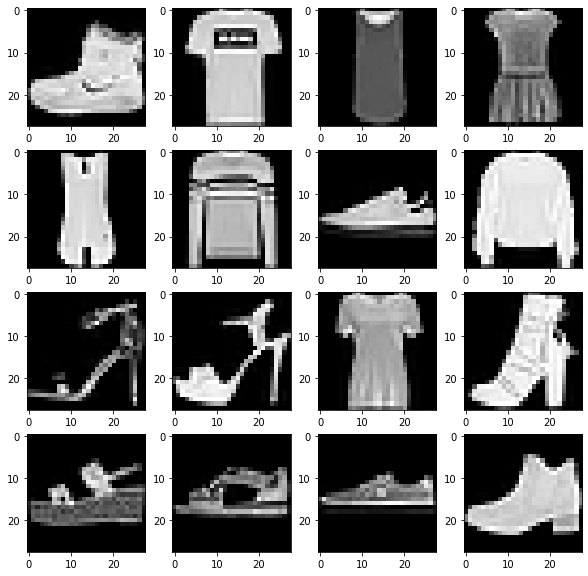

In [ ]:
# draw the graph

plt.figure(figsize=(10, 10))

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_X[i].reshape(28, 28), cmap='gray')

print(train_y[:16])

In [ ]:
# build the model

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [ ]:
# train the data

history = model.fit(train_X, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4623 - accuracy: 0.8362 - val_loss: 0.3713 - val_accuracy: 0.8617
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3362 - accuracy: 0.8762 - val_loss: 0.3693 - val_accuracy: 0.8631
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2838 - accuracy: 0.8950 - val_loss: 0.3667 - val_accuracy: 0.8737
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2447 - accuracy: 0.9093 - val_loss: 0.3801 - val_accuracy: 0.8717
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2135 - accuracy: 0.9204 - val_loss: 0.4491 - val_accuracy: 0.8619
Epoch 6/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.1841 - accuracy: 0.9311 - val_loss: 0.4522 - val_accuracy: 0.8674
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1637 - accuracy: 0.9390 - val_loss: 0.4932 - val_accuracy:

[1.407700777053833, 0.861299991607666]

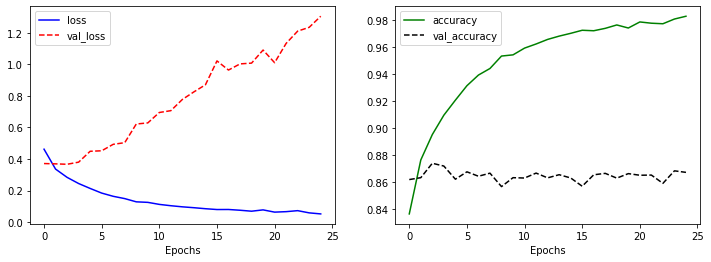

In [ ]:
# evaluate the model

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epochs')
plt.legend()

model.evaluate(test_X, test_y, verbose=0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters = 64),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.3),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5160 - accuracy: 0.8134 - val_loss: 0.3754 - val_accuracy: 0.8616
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3555 - accuracy: 0.8715 - val_loss: 0.3288 - val_accuracy: 0.8785
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3135 - accuracy: 0.8866 - val_loss: 0.3156 - val_accuracy: 0.8825
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2901 - accuracy: 0.8957 - val_loss: 0.2968 - val_accuracy: 0.8927
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2694 - accuracy: 0.9004 - val_loss: 0.2978 - val_accuracy: 0.8925
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2508 - accuracy: 0.9060 - val_loss: 0.2871 - val_accuracy: 0.8942
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2351 - accuracy: 0.9120 - val_loss: 0.2878 - val_accuracy:

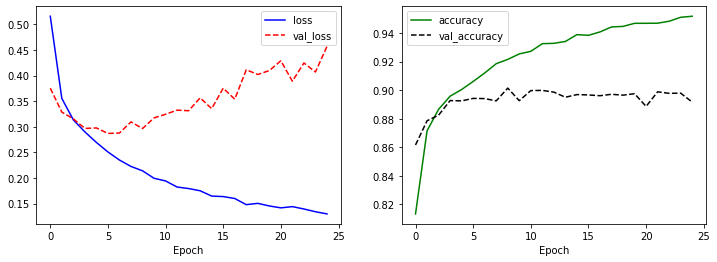

In [ ]:
history = model.fit(train_X, train_y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()